In [2]:
import json
import random
import torch
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
matplotlib.style.use('ggplot')
pd.set_option('max_colwidth',50)

In [28]:
fname = 'RM.filtered.default.jsonl'
d = list(json.loads(x) for x in open(fname, 'r', encoding='utf-8').read().strip().split('\n'))
df = pd.DataFrame(d)
# df['label'] = df['label'].apply(lambda x: sorted(list(set(x))))

In [29]:
df

,pred,text,label
0,[label_999054],杭州LGD大鹅对战广州TTG 第一小局，江城的孙尚香关键时刻，翻滚一个暴击击杀嬴政，帮助队伍...,[label_999054]
1,[label_472394],🍊 🍊 我用笔描绘你的美好，携带着落日的温柔，把热爱赠予最值得的你 @TF家族-张极,[label_472394]
2,[label_292252],我相信这也是因为他的工作人员办事很稳，他放心把这些事情交给他打理了吧，然后自己的精力都投入...,[label_292252]
3,"[label_1008181, label_1191241]",左航ZH✈️🪐 我的忧伤，因为有你的照耀，升起一圈淡淡的光轮 ——《会唱歌的鸢尾花》 舒婷...,"[label_1191241, label_1008181]"
4,[label_472394],✏️ 🗒 马上就要跟限定男初说再见啦👋🏻 @TF家族-张极 ​​​,[label_472394]
...,...,...,...
6966,[label_9162],各位大佬，帮孩子看看咋回事，电脑借给别人，别人说也没动过新建，起初还看不到新建，后来重启就有...,[label_9162]
6967,[label_594050],来人兴奋地对我说：“学画其实不难，我只听了几堂课，画出来的作品就有模有样了。”说着打开手机...,[label_594050]
6968,[label_982272],前夫之鉴by大芒果 攻好卑微好舔狗我好爱 受是双 ​​​,[label_982272]
6969,[label_1076578],骇客纠察队超话 在这里发发—— 微奈齐！ ​,[label_1076578]


In [31]:
df['total'] = df['label'].apply(len)
df['predicted'] = df['pred'].apply(len)
df['correct'] = df.apply(lambda x: len(set(x['pred']).intersection(x['label'])), axis=1)

In [13]:
df

,pred,text,label,total,predicted,correct,precision,recall,f1_score
0,[label_999054],杭州LGD大鹅对战广州TTG 第一小局，江城的孙尚香关键时刻，翻滚一个暴击击杀嬴政，帮助队伍...,[label_999054],1,1,1,1.0,1.0,1.0
1,[label_472394],🍊 🍊 我用笔描绘你的美好，携带着落日的温柔，把热爱赠予最值得的你 @TF家族-张极,[label_472394],1,1,1,1.0,1.0,1.0
2,[label_292252],我相信这也是因为他的工作人员办事很稳，他放心把这些事情交给他打理了吧，然后自己的精力都投入...,[label_292252],1,1,1,1.0,1.0,1.0
3,"[label_1008181, label_1191241]",左航ZH✈️🪐 我的忧伤，因为有你的照耀，升起一圈淡淡的光轮 ——《会唱歌的鸢尾花》 舒婷...,"[label_1191241, label_1008181]",2,2,2,1.0,1.0,1.0
4,[label_472394],✏️ 🗒 马上就要跟限定男初说再见啦👋🏻 @TF家族-张极 ​​​,[label_472394],1,1,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
6966,[label_9162],各位大佬，帮孩子看看咋回事，电脑借给别人，别人说也没动过新建，起初还看不到新建，后来重启就有...,[label_9162],1,1,1,1.0,1.0,1.0
6967,[label_594050],来人兴奋地对我说：“学画其实不难，我只听了几堂课，画出来的作品就有模有样了。”说着打开手机...,[label_594050],1,1,1,1.0,1.0,1.0
6968,[label_982272],前夫之鉴by大芒果 攻好卑微好舔狗我好爱 受是双 ​​​,[label_982272],1,1,1,1.0,1.0,1.0
6969,[label_1076578],骇客纠察队超话 在这里发发—— 微奈齐！ ​,[label_1076578],1,1,1,1.0,1.0,1.0


In [32]:
df2 = df.explode('label').groupby('label').sum()
df2['precision'] = df2.apply(lambda x: x['correct'] / x['predicted'] if x['predicted'] != 0 else 0, axis=1)
df2['recall'] = df2.apply(lambda x: x['correct'] / x['total'], axis=1)
df2['f1_score'] = df2.apply(lambda x: (2 * x['precision'] * x['recall']) / (x['precision'] + x['recall']) if (x['precision'] + x['recall']) != 0 else 0, axis=1)


In [33]:
df2.sort_values(by='f1_score')

,total,predicted,correct,precision,recall,f1_score
label,,,,,,
label_294315,2,1,0,0.0,0.0,0.0
label_572221,5,3,0,0.0,0.0,0.0
label_1319005,2,0,0,0.0,0.0,0.0
label_599807,23,6,0,0.0,0.0,0.0
label_604540,2,2,0,0.0,0.0,0.0
...,...,...,...,...,...,...
label_1361316,11,11,11,1.0,1.0,1.0
label_534116,2,2,2,1.0,1.0,1.0
label_548943,3,3,3,1.0,1.0,1.0


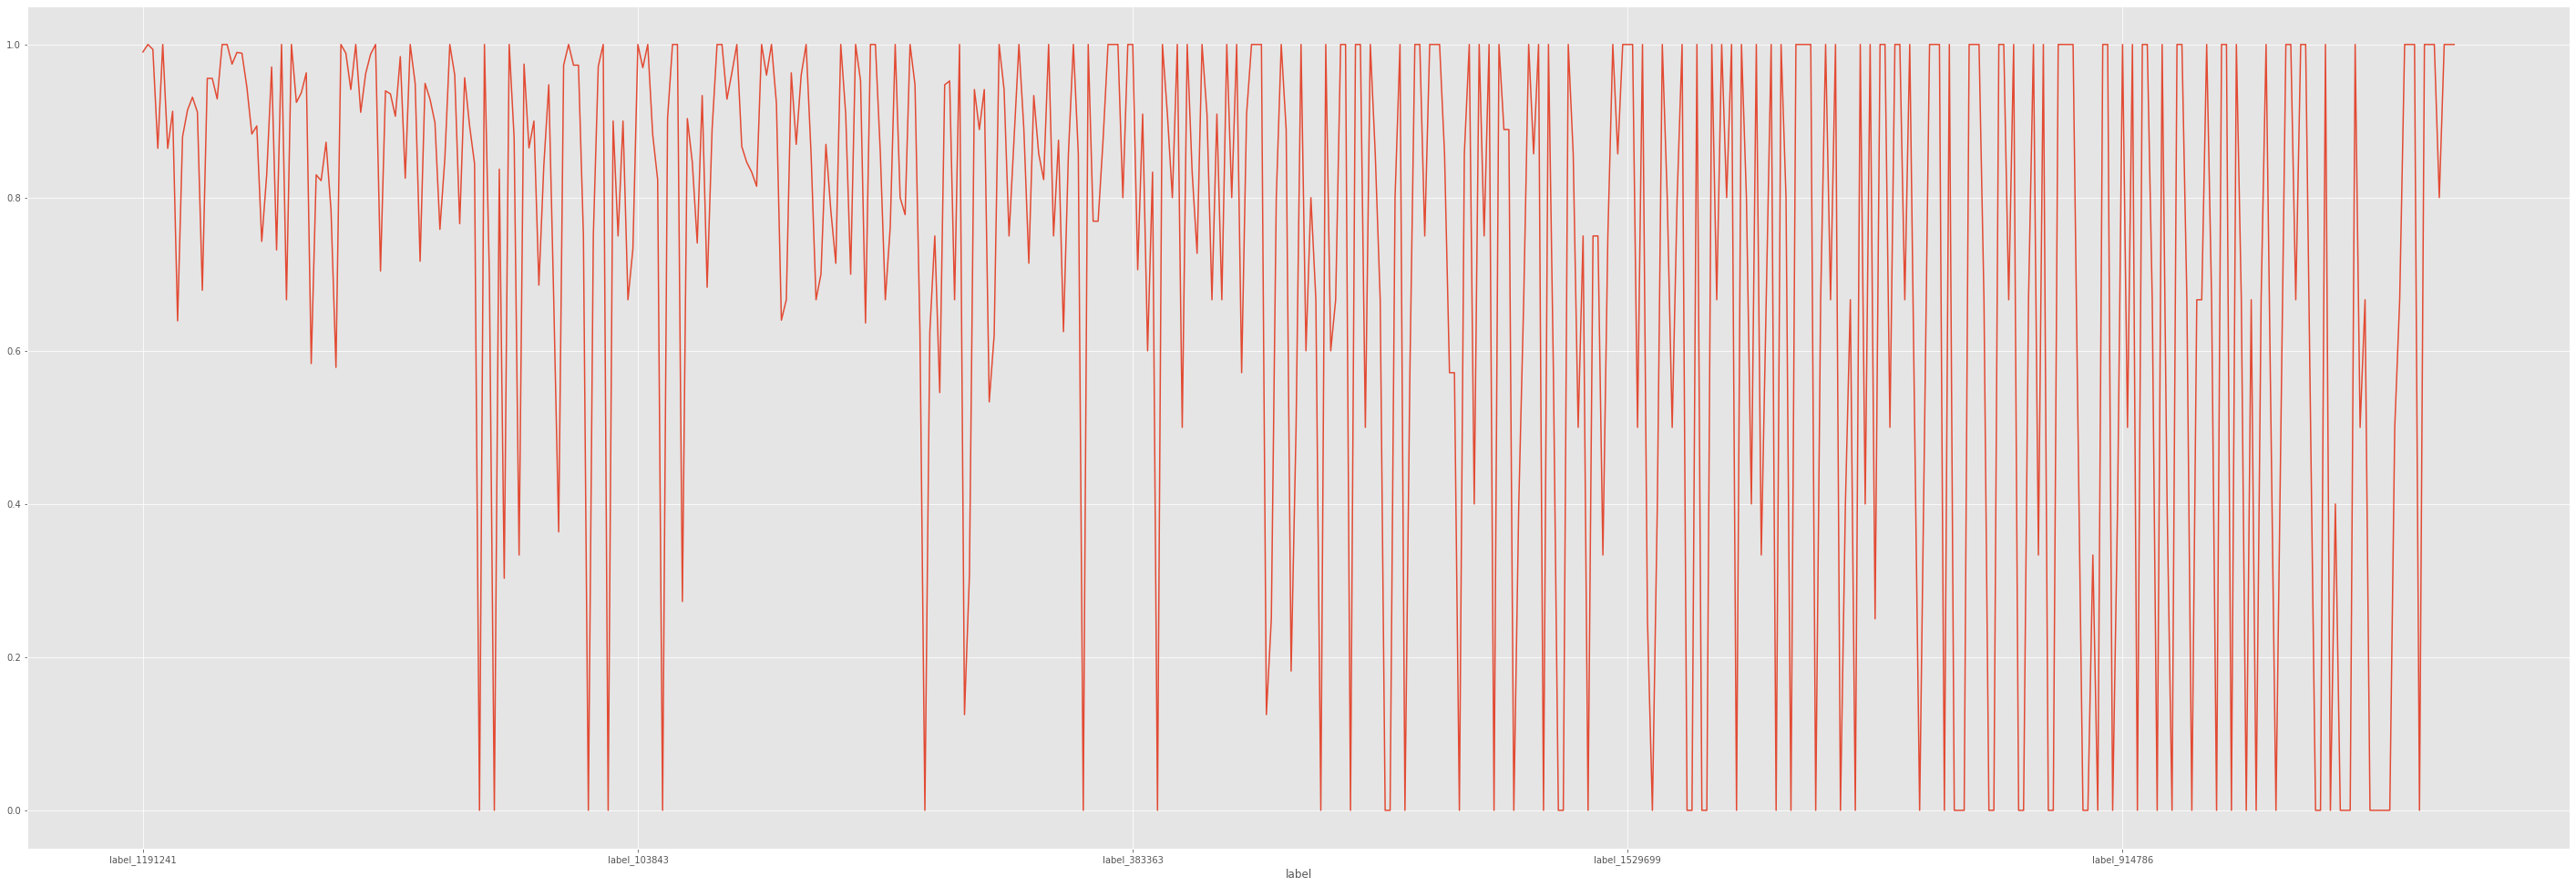

In [34]:
f1_scores = df2.sort_values(by='total', ascending=False)['f1_score']
f1_scores.plot(figsize=(50, 17))
plt.show()

In [19]:
def show_part(p):
    f1_scores = df2[p].sort_values(by='total', ascending=False)['f1_score']
    f1_scores.plot(figsize=(25, 10))
    plt.show()

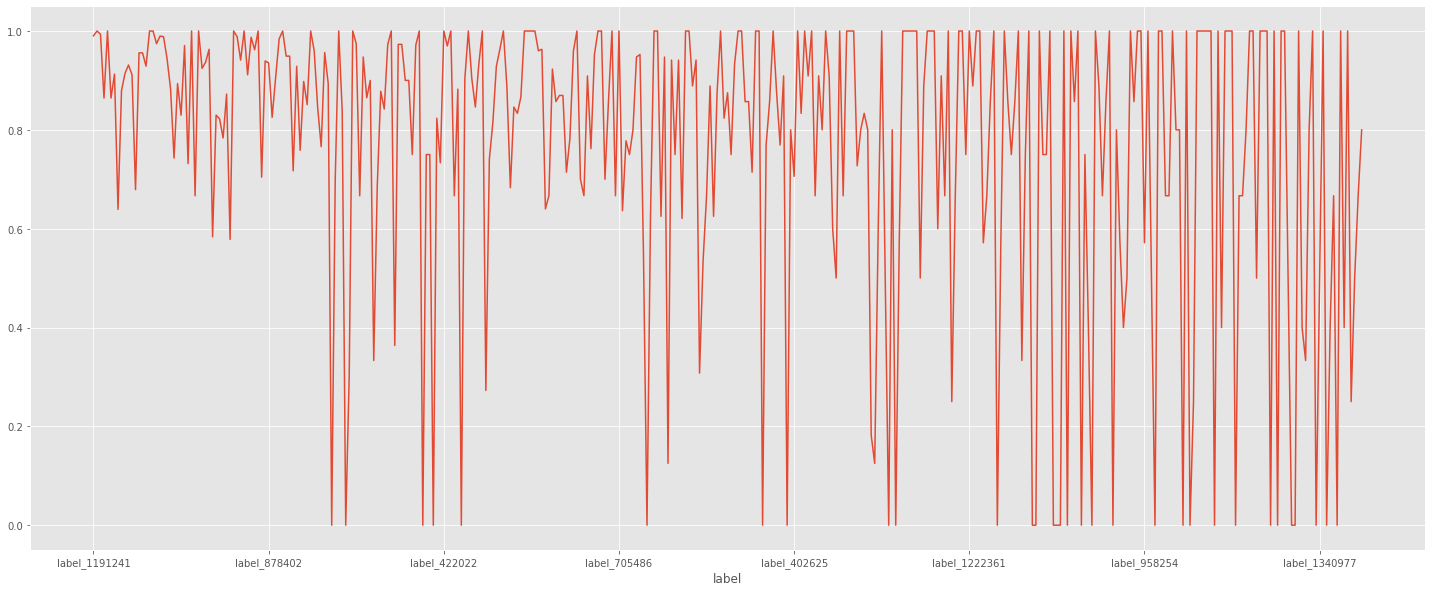

In [23]:
show_part(df2['total'] > 2)

In [25]:
df2[df2['f1_score'] < 0.1].sort_values(by='total', ascending=False)

,total,predicted,correct,precision,recall,f1_score
label,,,,,,
label_599807,23,6,0,0.0,0.0,0.0
label_1397538,22,6,0,0.0,0.0,0.0
label_1205879,18,10,0,0.0,0.0,0.0
label_487974,18,3,0,0.0,0.0,0.0
label_698073,16,8,0,0.0,0.0,0.0
...,...,...,...,...,...,...
label_1407054,2,1,0,0.0,0.0,0.0
label_1319005,2,0,0,0.0,0.0,0.0
label_604540,2,2,0,0.0,0.0,0.0


In [36]:
df2[df2['f1_score'] < 0.5]['total'].sum()

427

In [37]:
df2['total'].describe()

count     468.000000
mean       25.181624
std       136.434684
min         2.000000
25%         3.000000
50%         5.000000
75%        14.000000
max      2052.000000
Name: total, dtype: float64